In [17]:
import pandas as pd
import statsmodels.formula.api as smf


link = r'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
df = pd.read_csv(link)
model = smf.ols(formula='poverty ~ metro_res + white + hs_grad', data=df)
result = model.fit()
summ = result.summary()
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.55e-10
Time:                        00:42:39   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

lillieforsResult (0.11209113348529609, 0.11529199995159317)
ShapiroResult(statistic=0.9557526111602783, pvalue=0.05502479895949364)


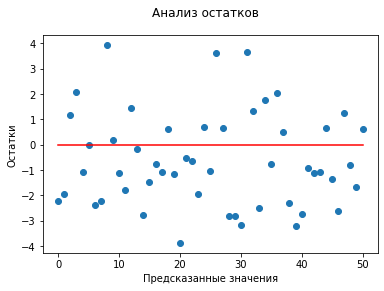

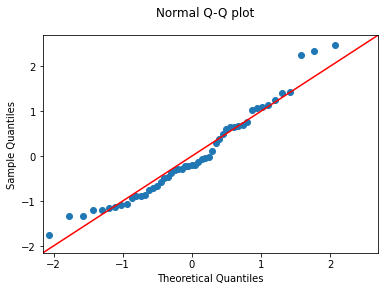

In [18]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from matplotlib import pyplot as plt


y = df['poverty']
X1 = df['metro_res']
X2 = df['white']
X3 = df['hs_grad']
residuals = y - (68.7 - 0.05 * X1 - 0.05 * X2 -0.57 * X3)

fig, ax = plt.subplots()
fig.suptitle('Анализ остатков')
ax.set_ylabel('Остатки')
ax.set_xlabel('Предсказанные значения')
ax.scatter([i for i in range(51)], residuals)
ax.plot([i for i in range(51)], [0 for i in range(51)], color='r')

res = result.resid
fig2 = sm.qqplot(res, fit=True, line="45")
fig2.suptitle("Normal Q-Q plot")

print('lillieforsResult', lilliefors(res))
print(shapiro(res))

In [19]:
res

0    -1.722346
1    -1.386533
2     1.895589
3     2.603608
4    -0.342305
5     0.715088
6    -1.646849
7    -1.570498
8     4.557916
9     0.890804
10   -0.562805
11   -1.239063
12    2.107732
13    0.532516
14   -2.125390
15   -0.863996
16   -0.117346
17   -0.534719
18    1.197208
19   -0.673439
20   -3.234603
21    0.226718
22   -0.019767
23   -1.287945
24    1.113182
25   -0.412636
26    4.161862
27    1.296512
28   -2.087629
29   -2.221957
30   -2.447376
31    4.316831
32    2.032695
33   -1.951891
34    2.319253
35   -0.089745
36    2.610443
37    1.199495
38   -1.636747
39   -2.469713
40   -2.218359
41   -0.369909
42   -0.533681
43   -0.399765
44    1.400675
45   -0.884802
46   -2.005512
47    1.953511
48   -0.258611
49   -1.046834
50    1.231135
dtype: float64